# EMG Biointerfacing

# Part 1: Controlling a dexterous prosthetic limb

Establishing Communications with the Modular Prosthetic Limb


1. Open the computer shortcut for JHUAPL vMPL Bimanual - Shortcut

  a. Select Screen Resolution: 1280 x 720, Windowed

  b. Graphics Quality: Good


## Changing the vMPL Camera View

Changing the vMPL Camera View
Within the vMPL window, you can change the isometric viewpoint of the camera that looks at the virtual prosthetic limbs.  This can be accomplished by using the directional keys on the keyboard (e.g. up, down, left, right) to move the camera, and using the mouse by left-clicking on the window and moving the mouse to change the camera angle.  
Note: if the camera is not movable, edit the camera_config.xml file in notepad and add this tag:
  <cameraFly> true </cameraFly>
Send limb commands from MATLAB


## Send limb commands from Python

The command messages are sent over the TCP/IP layer as UDP Datagrams:

In [ ]:
# Create a User Datagram Protocol (UDP) network socket for vMPL communications
import socket

UdpLocalPort = 25001  # 25101 = Left; 25001 = Right
UdpDestinationPort = 25000  # 25100 = Left; 25000 = Right
UdpAddress = '127.0.0.1'  # IP address of the Virtual MPL '127.0.0.1'
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind(('0.0.0.0', 25001))  # Bind the socket to receive incoming messages
sock.settimeout(3.0)  # seconds

Create a variable to store the 7 upper arm angles, in radians. 
1.	Shoulder Flexion (+) / Shoulder Extension (-)
2.	Shoulder Adduction (+) / Shoulder Abduction (-)
3.	Humeral Internal Rotation (+) / Humeral External Rotation  (-) 
4.	Elbow Flexion (+) / Elbow Extension (-)
5.	Wrist Pronation (+) / Wrist Supination (-)
6.	Ulnar Deviation (+) / Radial Deviation (-)
7.	Wrist Flexion (+) / Wrist Extension (-)


In [2]:
upperArmAngles = [0.0] * 7

Create a variable to store the 20 hand angles, in radians
1.	INDEX_AB_AD
2.	INDEX_MCP
3.	INDEX_PIP
4.	INDEX_DIP
5.	MIDDLE_AB_AD
6.	MIDDLE_MCP
7.	MIDDLE_PIP
8.	MIDDLE_DIP
9.	RING_AB_AD
10.	RING_MCP
11.	RING_PIP
12.	RING_DIP
13.	LITTLE_AB_AD
14.	LITTLE_MCP
15.	LITTLE_PIP
16.	LITTLE_DIP
17.	THUMB_CMC_AD_AB
18.	THUMB_CMC
19.	THUMB_MCP
20.	THUMB_DIP

Note: INDEX = Index Finger; MIDDLE = Middle Finger etc.
MCP = Metacarpophalangeal Joint Flexion/Extension (knuckles)
PIP = Proximal Interphalangeal Joint Flexion/Extension 
DIP = Distal Interphalangeal Joint Flexion/Extension 
CMC = Carpometacarpophalangeal Joint (Base of thumb)
AB_AD = Abduction Adduction (Side to Side motion)



In [3]:
handAngles = [0.0] * 20

Specify joint angles and transmit bytes

In [4]:
import math
import struct

upperArmAngles[0] = 35 * math.pi / 180
upperArmAngles[3] = 60 * math.pi / 180

values = upperArmAngles + handAngles
packer = struct.Struct('27f')
packed_data = packer.pack(*values)

sock.sendto(packed_data, ('127.0.0.1', 25000))

108

If you check the Virtual Arm Visualization and see the arm has moved then congratulations, you have now issued commands to the Modular Prosthetic Limb.   The tools included here will be identical if you are controlling the virtual limb, the physical limb, or both.  By prototyping in this way you can make a rapid transition from offline evaluation of your biointerface to controlling real hardware.  Using the TCP/IP model you can also control the limbs on other computers or over the internet.

## Explore:


Repeat the last lines of code above to achieve the positions listed below.  Take a screen shot (“Print Screen” button or use the Windows7 Snipping Tool) for each position and save this and the joint angles into a word document (“Ctrl-V” paste function) -- you will need these for your lab report. 
1)	Asking a Question
2)	Doing the Chicken-Dance
3)	We're #1
4)	Paper, Rock, or Scissors (choose 1)
Finally, add one position of your own choosing (5)



## If there is extra time at the end of the lab:

Update your commands to control both left and right arms independently
 

# Part 2: Using the Myo Armband EMG Biointerface



1)	Launch the Myo Armband Manager. (Right-Click the tray icon and select “Armband Manager”)

 
 
2)	Ensure the device is unplugged from USB and connected via Bluetooth (Press the “Connect” button)

3)	Place the Myo on your arm with the logo facing up (I.e. if you bend your elbow, it will be in the crook of your arm), and make sure that the USB port and battery light (see image below) is down towards your hand (not toward the elbow).  
 
Note: Myobands will go to sleep after 30 seconds of inactivity (as indicated by the blue line LED going off). If you aren’t getting any signals when using the device, reactivate by shaking the armband.
4)	Start the MyoUdp Shortcut and ensure data is streaming (numbers in brackets will change)

 

5)	Create the MATLAB Interface by creating a new script in the MATLAB editor, and enter the following commands.  Note: Upon issuing these commands the first time, this will launch a small executable that handles the device communication.


In [ ]:
import inputs.myo

myo = inputs.myo.MyoUdp(source='//127.0.0.1:10001', num_samples=250)
myo.connect()


In [20]:
myo.close()


## Get data and plot

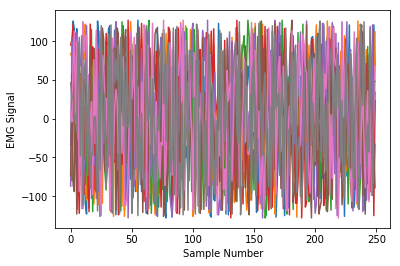

In [10]:
import matplotlib.pyplot as plt

emg = myo.get_data()

plt.plot(emg)
plt.xlabel('Sample Number')
plt.ylabel('EMG Signal')
plt.show()


## Real time signal viewer


In [ ]:

# Simple plot function for showing the EMG stream
# Requires matplotlib
#

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style

# Ensure that the minivie specific modules can be found on path allowing execution from the 'inputs' folder
import os
if os.path.split(os.getcwd())[1] == 'gui':
    import sys
    sys.path.insert(0, os.path.abspath('..'))
from inputs import myo


# Setup Data Source
m = myo.MyoUdp(source='//127.0.0.1:10001', num_samples=600)
m.connect()

style.use('dark_background')
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
fig.canvas.set_window_title('EMG Preview')


def animate(i):
    d = m.get_data() / 128  # *1 for a shallow copy

    for iChannel in range(0, 8):
        d[:, iChannel] = d[::-1, iChannel] + (1 * (iChannel + 1) )

    ax1.clear()
    ax1.plot(d)
    plt.ylim((0, 9))
    plt.xlabel('Samples')
    plt.ylabel('Channel')
    plt.title('EMG Stream')
    # print('{:0.2f}'.format(m.get_data_rate_emg()))


ani = animation.FuncAnimation(fig, animate, interval=150)
plt.show()


Write a set of commands that will acquire a set of data (using the previous get_data command) and then compute the root mean square amplitude from each of the channels of interest.  

In [19]:
import numpy as np

np.sqrt(np.mean(emg**2, axis=0))

array([ 75.22188511,  72.88835298,  72.70702855,  73.5572702 ,
        78.40533145,  73.43505975,  71.67311909,  73.41144325])

Record the RMS channel values for the 8 channels during the following movements. Please use the table given below.  (Note: For EMG, you must flex muscles as if working against resistance so that the muscle contraction is consistent and measurable.)

a.	Rest

b.	Wrist Flexion

c.	Wrist Extension

d.	Wrist Pronation

e.	Wrist Supination

f.	Cylindrical Grasp

g.	Tip Grasp

h.	Lateral Grasp

i.	Rest (repeat)

Optional:

j.	Index Finger

k.	Middle Finger

l.	Ring Finger

m.	Little Finger


# Part 3: Closing the Loop

In this part of the lab you will use the biointerface to "close the loop" between the human operator and the device by controlling the MPL using EMG data. To plan out the control, you will need to identify what characteristic of the EMG signal you want to use as an input, and how to control the device.

## Conventional Control Mode

In a conventional control mode for surface EMG, control will be achieved using the RMS value of 100ms of the EMG signal (sampled at 1kHz) for two channels. Look at the table you made in Part 2 and select the channel with the greatest RMS value during wrist flexion and wrist extension.


Detect intended motions:

In the code below, adjust the indicated parameters to assign channels for wrist flexion and extension, based on which channels had the greatest RMS values.  Also, set the activation threshold above the resting voltage but below the peak voltage so the arm only moves when commanded.


In [69]:
import time

chIds = [2, 4]  # <-- select channel ids controlling the wrist

for i in range(50):
    # add a 20 ms delay between loop iterations
    time.sleep(0.02)

    # get the data
    emg = myo.get_data()
    
    # compute the root-mean-square for the selected channels
    rms = np.sqrt(np.mean(emg[:, chIds]**2, axis=0))
    
    # compare the channel values to a numeric activation threshold to test which command to send
    if rms[0] > 20:     # <-- adjust channel activation threshold
        cmd = 'Wrist Flex'
    elif rms[1] > 20:   # <-- adjust channel activation threshold
        cmd = 'Wrist Extend'
    else:
        cmd = 'Rest'
        
    print('RMS ch {}={:.1f} RMS ch {}={:.1f} Command is {} '.format(chIds[0], rms[0], chIds[1], rms[1], cmd))


RMS ch 2=70.8 RMS ch 4=77.0 Wrist=1.4 deg
RMS ch 2=71.2 RMS ch 4=77.2 Wrist=2.8 deg
RMS ch 2=71.2 RMS ch 4=76.7 Wrist=4.1 deg
RMS ch 2=71.3 RMS ch 4=77.3 Wrist=5.5 deg
RMS ch 2=71.8 RMS ch 4=77.5 Wrist=6.9 deg
RMS ch 2=72.0 RMS ch 4=77.1 Wrist=8.3 deg
RMS ch 2=72.4 RMS ch 4=77.3 Wrist=9.6 deg
RMS ch 2=73.1 RMS ch 4=76.4 Wrist=11.0 deg
RMS ch 2=73.2 RMS ch 4=76.8 Wrist=12.4 deg
RMS ch 2=73.3 RMS ch 4=76.6 Wrist=13.8 deg


RMS ch 2=73.3 RMS ch 4=76.4 Wrist=15.1 deg
RMS ch 2=73.7 RMS ch 4=75.8 Wrist=16.5 deg
RMS ch 2=73.7 RMS ch 4=76.3 Wrist=17.9 deg
RMS ch 2=73.9 RMS ch 4=76.5 Wrist=19.3 deg
RMS ch 2=74.0 RMS ch 4=76.3 Wrist=20.6 deg
RMS ch 2=74.0 RMS ch 4=75.7 Wrist=22.0 deg
RMS ch 2=74.2 RMS ch 4=75.4 Wrist=23.4 deg
RMS ch 2=74.3 RMS ch 4=75.9 Wrist=24.8 deg
RMS ch 2=74.4 RMS ch 4=75.7 Wrist=26.1 deg
RMS ch 2=74.8 RMS ch 4=75.7 Wrist=27.5 deg


RMS ch 2=75.0 RMS ch 4=74.9 Wrist=28.9 deg
RMS ch 2=75.4 RMS ch 4=75.0 Wrist=30.3 deg
RMS ch 2=75.4 RMS ch 4=74.7 Wrist=31.6 deg
RMS ch 2=75.4 RMS ch 4=74.7 Wrist=33.0 deg
RMS ch 2=75.5 RMS ch 4=75.0 Wrist=34.4 deg
RMS ch 2=76.0 RMS ch 4=75.2 Wrist=35.8 deg
RMS ch 2=76.0 RMS ch 4=74.8 Wrist=37.1 deg
RMS ch 2=75.9 RMS ch 4=75.1 Wrist=38.5 deg
RMS ch 2=76.0 RMS ch 4=75.4 Wrist=39.9 deg
RMS ch 2=76.3 RMS ch 4=75.3 Wrist=41.3 deg


RMS ch 2=76.2 RMS ch 4=75.7 Wrist=42.6 deg
RMS ch 2=76.3 RMS ch 4=75.7 Wrist=44.0 deg
RMS ch 2=76.4 RMS ch 4=75.7 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=76.2 RMS ch 4=75.3 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=75.2 Wrist=45.0 deg
RMS ch 2=77.1 RMS ch 4=75.1 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=75.3 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=75.5 Wrist=45.0 deg
RMS ch 2=78.1 RMS ch 4=76.3 Wrist=45.0 deg


RMS ch 2=78.6 RMS ch 4=75.9 Wrist=45.0 deg
RMS ch 2=78.1 RMS ch 4=75.6 Wrist=45.0 deg
RMS ch 2=78.1 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=78.4 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=78.3 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=78.5 RMS ch 4=76.0 Wrist=45.0 deg
RMS ch 2=78.6 RMS ch 4=76.2 Wrist=45.0 deg
RMS ch 2=78.4 RMS ch 4=76.5 Wrist=45.0 deg
RMS ch 2=78.3 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=76.5 Wrist=45.0 deg


RMS ch 2=77.6 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=77.6 RMS ch 4=76.8 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=76.9 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.4 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.2 Wrist=45.0 deg
RMS ch 2=77.9 RMS ch 4=77.7 Wrist=45.0 deg
RMS ch 2=78.3 RMS ch 4=77.8 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=78.4 Wrist=45.0 deg
RMS ch 2=77.9 RMS ch 4=77.8 Wrist=45.0 deg


RMS ch 2=77.7 RMS ch 4=77.4 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=78.2 Wrist=45.0 deg
RMS ch 2=78.4 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=78.2 RMS ch 4=77.7 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=77.9 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.9 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=78.2 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.7 Wrist=45.0 deg
RMS ch 2=77.3 RMS ch 4=77.3 Wrist=45.0 deg


RMS ch 2=77.8 RMS ch 4=77.3 Wrist=45.0 deg
RMS ch 2=77.2 RMS ch 4=78.0 Wrist=45.0 deg
RMS ch 2=77.0 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.4 RMS ch 4=76.7 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.7 Wrist=45.0 deg
RMS ch 2=77.4 RMS ch 4=76.5 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.8 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.7 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.8 Wrist=45.0 deg


RMS ch 2=77.6 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=77.3 RMS ch 4=76.4 Wrist=45.0 deg
RMS ch 2=77.3 RMS ch 4=76.1 Wrist=45.0 deg
RMS ch 2=76.8 RMS ch 4=75.9 Wrist=45.0 deg
RMS ch 2=76.7 RMS ch 4=76.1 Wrist=45.0 deg
RMS ch 2=76.1 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=75.8 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=76.1 RMS ch 4=76.5 Wrist=45.0 deg
RMS ch 2=75.4 RMS ch 4=76.8 Wrist=45.0 deg
RMS ch 2=75.8 RMS ch 4=76.9 Wrist=45.0 deg


RMS ch 2=75.4 RMS ch 4=76.0 Wrist=45.0 deg
RMS ch 2=75.7 RMS ch 4=75.8 Wrist=45.0 deg
RMS ch 2=75.8 RMS ch 4=75.9 Wrist=45.0 deg
RMS ch 2=75.7 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=76.6 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=75.8 Wrist=45.0 deg
RMS ch 2=76.3 RMS ch 4=75.7 Wrist=45.0 deg
RMS ch 2=76.3 RMS ch 4=75.5 Wrist=45.0 deg
RMS ch 2=75.6 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=75.0 RMS ch 4=74.8 Wrist=45.0 deg


RMS ch 2=74.9 RMS ch 4=74.6 Wrist=45.0 deg
RMS ch 2=74.2 RMS ch 4=74.8 Wrist=45.0 deg
RMS ch 2=74.5 RMS ch 4=74.2 Wrist=45.0 deg
RMS ch 2=75.1 RMS ch 4=74.8 Wrist=45.0 deg
RMS ch 2=75.4 RMS ch 4=75.1 Wrist=45.0 deg
RMS ch 2=76.3 RMS ch 4=74.5 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=74.5 Wrist=45.0 deg
RMS ch 2=76.2 RMS ch 4=74.2 Wrist=45.0 deg
RMS ch 2=76.1 RMS ch 4=74.3 Wrist=45.0 deg
RMS ch 2=76.6 RMS ch 4=73.9 Wrist=45.0 deg


RMS ch 2=76.4 RMS ch 4=73.8 Wrist=45.0 deg
RMS ch 2=76.5 RMS ch 4=73.5 Wrist=45.0 deg
RMS ch 2=76.7 RMS ch 4=73.6 Wrist=45.0 deg
RMS ch 2=77.2 RMS ch 4=73.7 Wrist=45.0 deg
RMS ch 2=77.2 RMS ch 4=72.9 Wrist=45.0 deg
RMS ch 2=77.0 RMS ch 4=72.4 Wrist=45.0 deg
RMS ch 2=76.9 RMS ch 4=72.3 Wrist=45.0 deg
RMS ch 2=77.4 RMS ch 4=71.8 Wrist=45.0 deg
RMS ch 2=76.8 RMS ch 4=72.2 Wrist=45.0 deg
RMS ch 2=76.9 RMS ch 4=72.3 Wrist=45.0 deg


## Command joint velocity and position using EMG


In [82]:
import math
import struct 

# Create a User Datagram Protocol (UDP) network socket for vMPL communications
import socket

UdpLocalPort = 25001  # 25101 = Left; 25001 = Right
UdpDestinationPort = 25000  # 25100 = Left; 25000 = Right
UdpAddress = '127.0.0.1'  # IP address of the Virtual MPL '127.0.0.1'
sock = socket.socket(socket.AF_INET, socket.SOCK_DGRAM)
sock.bind(('0.0.0.0', 25001))  # Bind the socket to receive incoming messages
sock.settimeout(3.0)  # seconds


chIds = [2, 4]  # <-- select channels for wrist flex (1) and extend (2)

p = 0          # store current position
direction = 1  # specify a direction variable +/- 1
dt = 0.02       # define a loop iteration tim in seconds

upperArmAngles = [0.0] * 7
handAngles = [0.0] * 20

for i in range(120):
    # add a 20 ms delay between loop iterations
    time.sleep(dt)

    # get the data
    emg = myo.get_data()
    
    # compute the root-mean-square for the selected channels
    rms = np.sqrt(np.mean(emg[:, chIds]**2, axis=0))
        
    # threshold data to generate command of certain joint velocity/direction
    if rms[0] > 0.2:       # <-- adjust channel activation threshold
        v = +1.2  # fixed negative velocity
    elif rms[1] > 0.2:   # <-- adjust channel activation threshold
        v = -1.2  # fixed positive velocity
    else:
        v = 0
 
    # perform velocity integration to get position for joints
    p = p + (v * dt)
    
    # constrain the angle to the joint limits (between ±pi/4, or ±45deg)
    p = min(max(p,-math.pi/4),math.pi/4)
    
    # set the position of the wrist
    upperArmAngles[6] = p

    # send the arm command
    upperArmAngles[0] = 35 * math.pi / 180
    upperArmAngles[3] = 60 * math.pi / 180
    
    values = upperArmAngles + handAngles
    packer = struct.Struct('27f')
    packed_data = packer.pack(*values)
    
    sock.sendto(packed_data, ('127.0.0.1', 25000))
    
    # print the status 
    print('RMS ch {}={:.1f} RMS ch {}={:.1f} Wrist={:.1f} deg'.format(chIds[0], rms[0], chIds[1], rms[1], p * 180 / math.pi))



RMS ch 2=70.8 RMS ch 4=77.0 Wrist=1.4 deg
RMS ch 2=71.2 RMS ch 4=77.2 Wrist=2.8 deg
RMS ch 2=71.2 RMS ch 4=76.7 Wrist=4.1 deg
RMS ch 2=71.3 RMS ch 4=77.3 Wrist=5.5 deg
RMS ch 2=71.8 RMS ch 4=77.5 Wrist=6.9 deg
RMS ch 2=72.0 RMS ch 4=77.1 Wrist=8.3 deg
RMS ch 2=72.4 RMS ch 4=77.3 Wrist=9.6 deg
RMS ch 2=73.1 RMS ch 4=76.4 Wrist=11.0 deg
RMS ch 2=73.2 RMS ch 4=76.8 Wrist=12.4 deg
RMS ch 2=73.3 RMS ch 4=76.6 Wrist=13.8 deg


RMS ch 2=73.3 RMS ch 4=76.4 Wrist=15.1 deg
RMS ch 2=73.7 RMS ch 4=75.8 Wrist=16.5 deg
RMS ch 2=73.7 RMS ch 4=76.3 Wrist=17.9 deg
RMS ch 2=73.9 RMS ch 4=76.5 Wrist=19.3 deg
RMS ch 2=74.0 RMS ch 4=76.3 Wrist=20.6 deg
RMS ch 2=74.0 RMS ch 4=75.7 Wrist=22.0 deg
RMS ch 2=74.2 RMS ch 4=75.4 Wrist=23.4 deg
RMS ch 2=74.3 RMS ch 4=75.9 Wrist=24.8 deg
RMS ch 2=74.4 RMS ch 4=75.7 Wrist=26.1 deg
RMS ch 2=74.8 RMS ch 4=75.7 Wrist=27.5 deg


RMS ch 2=75.0 RMS ch 4=74.9 Wrist=28.9 deg
RMS ch 2=75.4 RMS ch 4=75.0 Wrist=30.3 deg
RMS ch 2=75.4 RMS ch 4=74.7 Wrist=31.6 deg
RMS ch 2=75.4 RMS ch 4=74.7 Wrist=33.0 deg
RMS ch 2=75.5 RMS ch 4=75.0 Wrist=34.4 deg
RMS ch 2=76.0 RMS ch 4=75.2 Wrist=35.8 deg
RMS ch 2=76.0 RMS ch 4=74.8 Wrist=37.1 deg
RMS ch 2=75.9 RMS ch 4=75.1 Wrist=38.5 deg
RMS ch 2=76.0 RMS ch 4=75.4 Wrist=39.9 deg
RMS ch 2=76.3 RMS ch 4=75.3 Wrist=41.3 deg


RMS ch 2=76.2 RMS ch 4=75.7 Wrist=42.6 deg
RMS ch 2=76.3 RMS ch 4=75.7 Wrist=44.0 deg
RMS ch 2=76.4 RMS ch 4=75.7 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=76.2 RMS ch 4=75.3 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=75.2 Wrist=45.0 deg
RMS ch 2=77.1 RMS ch 4=75.1 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=75.3 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=75.5 Wrist=45.0 deg
RMS ch 2=78.1 RMS ch 4=76.3 Wrist=45.0 deg


RMS ch 2=78.6 RMS ch 4=75.9 Wrist=45.0 deg
RMS ch 2=78.1 RMS ch 4=75.6 Wrist=45.0 deg
RMS ch 2=78.1 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=78.4 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=78.3 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=78.5 RMS ch 4=76.0 Wrist=45.0 deg
RMS ch 2=78.6 RMS ch 4=76.2 Wrist=45.0 deg
RMS ch 2=78.4 RMS ch 4=76.5 Wrist=45.0 deg
RMS ch 2=78.3 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=76.5 Wrist=45.0 deg


RMS ch 2=77.6 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=77.6 RMS ch 4=76.8 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=76.9 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.4 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.2 Wrist=45.0 deg
RMS ch 2=77.9 RMS ch 4=77.7 Wrist=45.0 deg
RMS ch 2=78.3 RMS ch 4=77.8 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=78.4 Wrist=45.0 deg
RMS ch 2=77.9 RMS ch 4=77.8 Wrist=45.0 deg


RMS ch 2=77.7 RMS ch 4=77.4 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=78.2 Wrist=45.0 deg
RMS ch 2=78.4 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=78.2 RMS ch 4=77.7 Wrist=45.0 deg
RMS ch 2=78.0 RMS ch 4=77.9 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.9 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=78.2 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=77.7 Wrist=45.0 deg
RMS ch 2=77.3 RMS ch 4=77.3 Wrist=45.0 deg


RMS ch 2=77.8 RMS ch 4=77.3 Wrist=45.0 deg
RMS ch 2=77.2 RMS ch 4=78.0 Wrist=45.0 deg
RMS ch 2=77.0 RMS ch 4=77.6 Wrist=45.0 deg
RMS ch 2=77.4 RMS ch 4=76.7 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.7 Wrist=45.0 deg
RMS ch 2=77.4 RMS ch 4=76.5 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.8 Wrist=45.0 deg
RMS ch 2=77.8 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.7 Wrist=45.0 deg
RMS ch 2=77.7 RMS ch 4=76.8 Wrist=45.0 deg


RMS ch 2=77.6 RMS ch 4=76.6 Wrist=45.0 deg
RMS ch 2=77.3 RMS ch 4=76.4 Wrist=45.0 deg
RMS ch 2=77.3 RMS ch 4=76.1 Wrist=45.0 deg
RMS ch 2=76.8 RMS ch 4=75.9 Wrist=45.0 deg
RMS ch 2=76.7 RMS ch 4=76.1 Wrist=45.0 deg
RMS ch 2=76.1 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=75.8 RMS ch 4=76.3 Wrist=45.0 deg
RMS ch 2=76.1 RMS ch 4=76.5 Wrist=45.0 deg
RMS ch 2=75.4 RMS ch 4=76.8 Wrist=45.0 deg
RMS ch 2=75.8 RMS ch 4=76.9 Wrist=45.0 deg


RMS ch 2=75.4 RMS ch 4=76.0 Wrist=45.0 deg
RMS ch 2=75.7 RMS ch 4=75.8 Wrist=45.0 deg
RMS ch 2=75.8 RMS ch 4=75.9 Wrist=45.0 deg
RMS ch 2=75.7 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=76.6 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=75.8 Wrist=45.0 deg
RMS ch 2=76.3 RMS ch 4=75.7 Wrist=45.0 deg
RMS ch 2=76.3 RMS ch 4=75.5 Wrist=45.0 deg
RMS ch 2=75.6 RMS ch 4=75.4 Wrist=45.0 deg
RMS ch 2=75.0 RMS ch 4=74.8 Wrist=45.0 deg


RMS ch 2=74.9 RMS ch 4=74.6 Wrist=45.0 deg
RMS ch 2=74.2 RMS ch 4=74.8 Wrist=45.0 deg
RMS ch 2=74.5 RMS ch 4=74.2 Wrist=45.0 deg
RMS ch 2=75.1 RMS ch 4=74.8 Wrist=45.0 deg
RMS ch 2=75.4 RMS ch 4=75.1 Wrist=45.0 deg
RMS ch 2=76.3 RMS ch 4=74.5 Wrist=45.0 deg
RMS ch 2=76.4 RMS ch 4=74.5 Wrist=45.0 deg
RMS ch 2=76.2 RMS ch 4=74.2 Wrist=45.0 deg
RMS ch 2=76.1 RMS ch 4=74.3 Wrist=45.0 deg
RMS ch 2=76.6 RMS ch 4=73.9 Wrist=45.0 deg


RMS ch 2=76.4 RMS ch 4=73.8 Wrist=45.0 deg
RMS ch 2=76.5 RMS ch 4=73.5 Wrist=45.0 deg
RMS ch 2=76.7 RMS ch 4=73.6 Wrist=45.0 deg
RMS ch 2=77.2 RMS ch 4=73.7 Wrist=45.0 deg
RMS ch 2=77.2 RMS ch 4=72.9 Wrist=45.0 deg
RMS ch 2=77.0 RMS ch 4=72.4 Wrist=45.0 deg
RMS ch 2=76.9 RMS ch 4=72.3 Wrist=45.0 deg
RMS ch 2=77.4 RMS ch 4=71.8 Wrist=45.0 deg
RMS ch 2=76.8 RMS ch 4=72.2 Wrist=45.0 deg
RMS ch 2=76.9 RMS ch 4=72.3 Wrist=45.0 deg


## Using Motion Based Inputs
In this example, you will use motion sensors as additional inputs for controlling an arm.  The Myo Armband transmits its orientation (Rx, Ry, Rz), linear acceleration (Ax, Ay, Az) and angular rate (dRx, dRy, dRz) using a gyroscope.  For this strategy, we’ll use the orientation for the elbow angle directly.  For the shoulder flexion angle, we’ll use the angular rate such that jerking your arm up will raise the shoulder and rapidly extending your arm will lower the shoulder.


In [89]:

SHFE = 0   # store an initial angle for the shoulder

for i in range(120): 
 
    emg = myo.get_data()          # update myo and get data
    Rxyz = myo.get_angles()       # get orientation angles
    imu = myo.get_imu()      # get angular rate
    Rxyz_dot = imu['gyro']
    #print(Rxyz_dot)
    
    # use the arm band angle as the elbow angle directly
    ELBOW = Rxyz[1] + 90
 
    # For the shoulder, use the angular rate of the armband.
    # If the angular rate is fast, change the shoulder angle
    if abs(Rxyz_dot[1]) > 300:
        # rotate the shoulder in proportion to angular rate
        SHFE = SHFE + 0.01*Rxyz_dot[1]
    
    # constrain the shoulder angle to -15 < x < 180 degrees
    SHFE = min(max(SHFE,-15),180)
    
    print('Shoulder FE angle is: {:.1f} degrees'.format(SHFE))
 
    # convert armband angles (deg) to MPL joint angles (rad)
    upperArmAngles[0] = SHFE * math.pi / 180
    upperArmAngles[3] = ELBOW * math.pi / 180
    
    # send the commands
    values = upperArmAngles + handAngles
    packer = struct.Struct('27f')
    packed_data = packer.pack(*values)
    
    sock.sendto(packed_data, ('127.0.0.1', 25000))


Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: 0.0 degrees
Shoulder FE angle is: -15.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder FE angle is: 180.0 degrees
Shoulder F

In [90]:
import scenarios
from pattern_rec import training
from utilities.user_config import get_user_config_var, read_user_config, setup_file_logging

# Setup MPL scenario
# A Scenario is the fundamental building blocks of the VIE: Inputs, Signal Analysis, System Plant, and Output Sink

read_user_config('C:/git/minivie/python/minivie/BEPI.xml')

vie = scenarios.MplScenario()

vie.TrainingInterface = training.TrainingManagerWebsocket()
vie.TrainingInterface.setup(port=9090)
vie.TrainingInterface.add_message_handler(vie.command_string)
vie.setup()

try:
    vie.run()
except KeyboardInterrupt:
    vie.close()
    vie.TrainingInterface.close()

Exception in thread WebThread:
Traceback (most recent call last):
  File "C:\Users\armigrs1\AppData\Local\Programs\Python\Python36\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "C:\Users\armigrs1\AppData\Local\Programs\Python\Python36\lib\threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\armigrs1\AppData\Local\Programs\Python\Python36\lib\site-packages\tornado\ioloop.py", line 755, in start
    raise RuntimeError("IOLoop is already running")
RuntimeError: IOLoop is already running

CRITICAL:root:Failed to find file ../../WrRocDefaults.xml in C:\git\minivie. Program Halted.


File Not Found: TRAINING_DATA.hdf5
No Data


SystemExit: 1

TypeError: 'level' is an invalid keyword argument for this function